In [2]:
import pandas as pd
import os
from selenium import webdriver
import datetime
import time
import requests
import cPickle
from bs4 import BeautifulSoup
import json
from matplotlib import pyplot as plt

%matplotlib inline

Load same list of path extensions used for main scrape:

In [3]:
paths = pd.read_csv('assets/world_paths_KEEP.csv')

Repeat the scrape as many times as needed to finish all sites ('n' integer in [0, <#scrapes required>]:

In [10]:
n = 0

URL = 'https://www.viamichelin.com'
world_soup = []
world_path = []


start = datetime.datetime.now()
print 'start time: %s\n' %start
range_list = [  
    range(1, 18670)  #REDO_world_soup_1.p n = 0
    ]

count = -1

for i in range_list[n]: #
    time.sleep(1)
    
    tiny_request = requests.get(URL + paths['path'][i])
    if str(tiny_request) != '<Response [200]>':
        print '\n'
        print URL + paths['path'][i]
        print '\n'
    
    chromedriver = '/Users/Rebecca/DSI-projects/projects/capstone/chromedriver'
    os.environ["webdriver.chrome.driver"] = chromedriver
    driver = webdriver.Chrome(chromedriver)
    driver.get(URL + paths['path'][i])
    world_soup.append(driver.page_source)
    world_path.append(paths['path'][i])
    driver.close()
          
    
    if i%50 == 0:
        print len(world_soup),
        os.system('say "%s"' %(float(count)/len(range_list[n])))
    count+= 1
driver.quit()    
    
    
midway = datetime.datetime.now()
print '\n\nscraping done!  that took %s.  pickle time...' %(midway - start)

name = 'world_soup_{0}of10_chromedriver.p'.format(n+1)

#cPickle.dump(world_soup, open(name, 'wb'))

finish = datetime.datetime.now()
print '\nfinish time: %s' %finish
print '\nelapsed time: %s' %(finish - start)
os.system('say "All done!"')

start time: 2016-08-24 13:23:05.050340



scraping done!  that took 0:02:34.204605.  pickle time...

finish time: 2016-08-24 13:25:39.255256

elapsed time: 0:02:34.204916


0

List of URLs with non-[200] response:

https://www.viamichelin.com/web/Restaurant/BOLZONE-26010-Trattoria_Via_Vai-148061-41102

https://www.viamichelin.com/web/Restaurant/Muhlbach_sur_Munster-68380-Perle_des_Vosges-12021-41102

https://www.viamichelin.com/web/Restaurant/Chicago-60602-Atwood-268972-41102

https://www.viamichelin.com/web/Restaurant/Biarritz-64200-Chez_Ospi-337162-41102

Final run for URLs in spat-out list:

In [27]:
dontforgetus = [
'https://www.viamichelin.com/web/Restaurant/BOLZONE-26010-Trattoria_Via_Vai-148061-41102',
'https://www.viamichelin.com/web/Restaurant/Muhlbach_sur_Munster-68380-Perle_des_Vosges\
                                                                                -12021-41102',
'https://www.viamichelin.com/web/Restaurant/Chicago-60602-Atwood-268972-41102',
'https://www.viamichelin.com/web/Restaurant/Biarritz-64200-Chez_Ospi-337162-41102']

forgetful_soup = []

start = datetime.datetime.now()
print 'start time: %s\n' %start

for i in dontforgetus:
    time.sleep(1)
    
    tiny_request = requests.get(i)
    if str(tiny_request) != '<Response [200]>':
        print '\n'
        print i
        print '\n'
    
    chromedriver = '/Users/Rebecca/DSI-projects/projects/capstone/chromedriver'
    os.environ["webdriver.chrome.driver"] = chromedriver
    driver = webdriver.Chrome(chromedriver)
    driver.get(i)
    forgetful_soup.append(driver.page_source)
    driver.close()

driver.quit()    
    
    
midway = datetime.datetime.now()
print '\n\nscraping done!  that took %s.  pickle time...' %(midway - start)

cPickle.dump(forgetful_soup, open('world_soup_6-13of10_chromedriver.p', 'wb'))

finish = datetime.datetime.now()
print '\nfinish time: %s' %finish
print '\nelapsed time: %s' %(finish - start)
os.system('say "All done!"')

start time: 2016-08-25 01:04:22.168181



https://www.viamichelin.com/web/Restaurant/Biarritz-64200-Chez_Ospi-337162-41102




scraping done!  that took 0:00:30.234236.  pickle time...

finish time: 2016-08-25 01:04:52.413917

elapsed time: 0:00:30.245736


0

Biarritz restaurant is a dead link; ignore it as we did before.

Write a function to pull out the 'script' tags, append them to a list (one per observation), and in the same row have some distinguising feature so we can merge dataframes afterward:

In [ ]:
def inspectorize(list_soup):
    
    '''This function creates a dataframe with information about inspectors.'''
    
    name = []
    latitude = []
    longitude = []
    scripts = []
    
    count = -1
    
    now = datetime.datetime.now()
    #print 'inspectorize start time: %s' %now

    
    for tiny_soup in list_soup:
        
        ## GET RESTAURANT NAME
        name_result = tiny_soup.findAll('div', class_ = 'datasheet-item datasheet-name')
        if name_result:
            for rest_name in name_result:
                name_text = rest_name.text.encode('utf-8')
                name_text = name_text.replace('\n\t', '')
                name_text = name_text.replace('\n', '')
                name.append(name_text)
        else:
            name.append(None)
            
            
        ## GET SCRIPTS
        script_result = tiny_soup.findAll('script')
        if script_result:
            big_scripts = []
            for lil_script in script_result:
                scripty = lil_script.encode('utf-8')
                big_scripts.append(scripty)
            scripts.append(big_scripts)
        else:
            name.append(None)

            
        ## GET LATITUDE AND LONGITUDE 
        geolocs = tiny_soup.findAll('div', class_ = 'datasheet-link-to-itinerary')
        if geolocs:
            for lil_latlon in geolocs:
                for link in lil_latlon.findAll('a'):
                    latlon_split = link['href']
                    latlon_split = (latlon_split.split(';'))[1]
                    latlon_split = latlon_split.split(':')
                    latitude.append(float(latlon_split[1]))
                    longitude.append(float(latlon_split[0]))
        else:
            latitude.append(None)
            longitude.append(None)
            
          
        ## MAKE SURE NO MISMATCHES IN LIST LENGTH    
        length_list = [len(name), len(scripts), len(latitude), len(longitude)]
        
        if len(set(length_list)) > 1:

            print set(length_list)
            print 'Things got screwy near %s!\n' %name_text
            print 'name: %s' %len(name)
            print 'latitude: %s' %len(latitude)
            print 'longitude: %s' %len(longitude)
            print 'scripts: %s' %len(scripts)
            os.system('say "Problem!  Please check."')
            break
        
        else:
            continue
            
        count += 1
        if count%100 == 0:
            print float(count)/len(list_soup),
  
    df_scripts = pd.DataFrame(zip(name, latitude, longitude, scripts), \
        columns = ['name', 'latitude', 'longitude', 'scripts'])
    
    print '.',
    now_now = datetime.datetime.now()
    #print 'inspectorize end time: %s' %now_now
    elapsed_now = now_now - now
    #print 'inspectorize elapsed time: %s' %elapsed_now
    
    return df_scripts

In [3]:
start0 = datetime.datetime.now()
print 'start time: %s' %start0
soup_1 = cPickle.load(open('assets/chromedriver scrapes/world_soup_1-1of10_chromedriver.p', 'rb'))
start1 = datetime.datetime.now()
print 'soup1 took: %s' %(start1 - start0)
soup_2 = cPickle.load(open('assets/chromedriver scrapes/world_soup_1-2of10_chromedriver.p', 'rb'))
start2 = datetime.datetime.now()
print 'soup2 took: %s' %(start2 - start1)
soup_3 = cPickle.load(open('assets/chromedriver scrapes/world_soup_1-3of10_chromedriver.p', 'rb'))
start3 = datetime.datetime.now()
print 'soup3 took: %s' %(start3 - start2)
soup_4 = cPickle.load(open('assets/chromedriver scrapes/world_soup_1-4of10_chromedriver.p', 'rb'))
start4 = datetime.datetime.now()
print 'soup4 took: %s' %(start4 - start3)
soup_5 = cPickle.load(open('assets/chromedriver scrapes/world_soup_1-5of10_chromedriver.p', 'rb'))
start5 = datetime.datetime.now()
print 'soup5 took: %s' %(start5 - start4)
soup_6 = cPickle.load(open('assets/chromedriver scrapes/world_soup_1-6of10_chromedriver.p', 'rb'))
start6 = datetime.datetime.now()
print 'soup6 took: %s' %(start6 - start5)
soup_7 = cPickle.load(open('assets/chromedriver scrapes/world_soup_2-1of10_chromedriver.p', 'rb'))
start7 = datetime.datetime.now()
print 'soup7 took: %s' %(start7 - start6)
soup_8 = cPickle.load(open('assets/chromedriver scrapes/world_soup_2-2of10_chromedriver.p', 'rb'))
start8 = datetime.datetime.now()
print 'soup8 took: %s' %(start8 - start7)
soup_9 = cPickle.load(open('assets/chromedriver scrapes/world_soup_2-3of10_chromedriver.p', 'rb'))
start9 = datetime.datetime.now()
print 'soup9 took: %s' %(start9 - start8)
soup_10 = cPickle.load(open('assets/chromedriver scrapes/world_soup_2-4of10_chromedriver.p', 'rb'))
start10 = datetime.datetime.now()
print 'soup10 took: %s' %(start10 - start9)

world_soups_1 = [soup_1, soup_2, soup_3, soup_4, soup_5, soup_6, soup_7, soup_8, soup_9, soup_10]

biggest_df = pd.DataFrame()
for i in [soup_1, soup_2]:
    soup_list = []
    print '.',
    for j in i:
        souplet = BeautifulSoup(j, 'lxml')
        soup_list.append(souplet)
    big_df = inspectorize(soup_list)
    biggest_df = pd.concat([biggest_df, big_df], axis = 0)

len(biggest_df)

In [ ]:
start0 = datetime.datetime.now()
print 'start time: %s' %start0
soup_11 = cPickle.load(open('assets/chromedriver scrapes/world_soup_3-1of10_chromedriver.p', 'rb'))
start11 = datetime.datetime.now()
print 'soup_11 took: %s' %(start11 - start0)
soup_12 = cPickle.load(open('assets/chromedriver scrapes/world_soup_3-2of10_chromedriver.p', 'rb'))
start12 = datetime.datetime.now()
print 'soup_12 took: %s' %(start12 - start11)
soup_13 = cPickle.load(open('assets/chromedriver scrapes/world_soup_3-3of10_chromedriver.p', 'rb'))
start13 = datetime.datetime.now()
print 'soup_13 took: %s' %(start13 - start12)
soup_14 = cPickle.load(open('assets/chromedriver scrapes/world_soup_3-4of10_chromedriver.p', 'rb'))
start14 = datetime.datetime.now()
print 'soup_14 took: %s' %(start14 - start13)
soup_15 = cPickle.load(open('assets/chromedriver scrapes/world_soup_3-5of10_chromedriver.p', 'rb'))
start15 = datetime.datetime.now()
print 'soup_15 took: %s' %(start15 - start14)
soup_16 = cPickle.load(open('assets/chromedriver scrapes/world_soup_3-6of10_chromedriver.p', 'rb'))
start16 = datetime.datetime.now()
print 'soup_16 took: %s' %(start16 - start15)
soup_17 = cPickle.load(open('assets/chromedriver scrapes/world_soup_3-7of10_chromedriver.p', 'rb'))
start17 = datetime.datetime.now()
print 'soup_17 took: %s' %(start17 - start16)
soup_18 = cPickle.load(open('assets/chromedriver scrapes/world_soup_4-1of10_chromedriver.p', 'rb'))
start18 = datetime.datetime.now()
print 'soup_18 took: %s' %(start18 - start17)
soup_19= cPickle.load(open('assets/chromedriver scrapes/world_soup_4-2of10_chromedriver.p', 'rb'))
start19 = datetime.datetime.now()
print 'soup_19 took: %s' %(start19 - start18)
soup_20 = cPickle.load(open('assets/chromedriver scrapes/world_soup_4-3of10_chromedriver.p', 'rb'))
start20 = datetime.datetime.now()
print 'soup_20 took: %s' %(start20 - start19)
soup_21 = cPickle.load(open('assets/chromedriver scrapes/world_soup_4-4of10_chromedriver.p', 'rb'))
start21 = datetime.datetime.now()
print 'soup_21 took: %s' %(start21 - start20)
soup_22 = cPickle.load(open('assets/chromedriver scrapes/world_soup_4-5of10_chromedriver.p', 'rb'))
start22 = datetime.datetime.now()
print 'soup_22 took: %s' %(start22 - start21)

world_soup_2 = [soup_11, soup_12, soup_13, soup_14, soup_15, soup_16, soup_17, soup_18, \
                soup_19, soup_20, soup_21, soup_22]

for i in world_soup_2:
    soup_list = []
    print '.',
    for j in i:
        souplet = BeautifulSoup(j, 'lxml')
        soup_list.append(souplet)
    big_df = inspectorize(soup_list)
    biggest_df = pd.concat([biggest_df, big_df], axis = 0)

len(biggest_df)

In [13]:
start0 = datetime.datetime.now()
soup_23 = cPickle.load(open('assets/chromedriver scrapes/world_soup_5-1of10_chromedriver.p', 'rb'))
start23 = datetime.datetime.now()
print 'soup_23 took: %s' %(start23 - start0)
soup_24 = cPickle.load(open('assets/chromedriver scrapes/world_soup_5-2of10_chromedriver.p', 'rb'))
start24 = datetime.datetime.now()
print 'soup_24 took: %s' %(start24 - start23)
soup_25 = cPickle.load(open('assets/chromedriver scrapes/world_soup_5-3of10_chromedriver.p', 'rb'))
start25 = datetime.datetime.now()
print 'soup_25 took: %s' %(start25 - start24)
soup_26 = cPickle.load(open('assets/chromedriver scrapes/world_soup_5-4of10_chromedriver.p', 'rb'))
start26 = datetime.datetime.now()
print 'soup_26 took: %s' %(start26 - start25)
soup_27 = cPickle.load(open('assets/chromedriver scrapes/world_soup_5-5of10_chromedriver.p', 'rb'))
start27 = datetime.datetime.now()
print 'soup_27 took: %s' %(start27 - start26)
soup_28 = cPickle.load(open('assets/chromedriver scrapes/world_soup_5-6of10_chromedriver.p', 'rb'))
start28 = datetime.datetime.now()
print 'soup_28 took: %s' %(start28 - start27)
soup_29 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-12of10_chromedriver.p', 'rb'))
start29 = datetime.datetime.now()
print 'soup_29 took: %s' %(start29 - start28)
soup_30 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-2of10_chromedriver.p', 'rb'))
start30 = datetime.datetime.now()
print 'soup_30 took: %s' %(start30 - start29)
soup_31 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-3of10_chromedriver.p', 'rb'))
start31 = datetime.datetime.now()
print 'soup_31 took: %s' %(start31 - start30)
soup_32 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-4of10_chromedriver.p', 'rb'))
start32 = datetime.datetime.now()
print 'soup_32 took: %s' %(start32 - start31)
soup_33 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-5of10_chromedriver.p', 'rb'))
start33 = datetime.datetime.now()
print 'soup_33 took: %s' %(start33 - start32)
soup_34 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-6of10_chromedriver.p', 'rb'))
start34 = datetime.datetime.now()
print 'soup_34 took: %s' %(start34 - start33)
soup_35 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-7of10_chromedriver.p', 'rb'))
start35 = datetime.datetime.now()
print 'soup_35 took: %s' %(start35 - start34)
soup_36 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-8of10_chromedriver.p', 'rb'))
start36 = datetime.datetime.now()
print 'soup_36 took: %s' %(start36 - start35)
soup_37 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-9of10_chromedriver.p', 'rb'))
start37 = datetime.datetime.now()
print 'soup_37 took: %s' %(start37 - start36)
soup_38 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-10of10_chromedriver.p', 'rb'))
start38 = datetime.datetime.now()
print 'soup_38 took: %s' %(start38 - start37)
soup_39 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-11of10_chromedriver.p', 'rb'))
start39 = datetime.datetime.now()
print 'soup_39 took: %s' %(start39 - start38)
soup_40 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-12of10_chromedriver.p', 'rb'))
start40 = datetime.datetime.now()
print 'soup_40 took: %s' %(start40 - start39)
soup_41 = cPickle.load(open('assets/chromedriver scrapes/world_soup_6-13of10_chromedriver.p', 'rb'))
start41 = datetime.datetime.now()
print 'soup_41 took: %s' %(start41 - start40)

world_soup_3 = [soup_23, soup_24, soup_25, soup_26, soup_27, soup_28, soup_29, soup_30, \
               soup_31, soup_32, soup_33, soup_34, soup_35, soup_36, soup_37, soup_38, \
               soup_39, soup_40, soup_41]

count = -1
for i in world_soup_3:
    soup_list = []
    count += 1
    if count > 0: 
        print '.',
    for j in i:
        souplet = BeautifulSoup(j, 'lxml')
        soup_list.append(souplet)
    big_df = inspectorize(soup_list)
    biggest_df = pd.concat([biggest_df, big_df], axis = 0)

len(biggest_df)

In [16]:
# cPickle.dump(biggest_df, open('assets/df_JSON_blobs_unmerged.p', 'wb'))

https://pythonspot.com/en/json-encoding-and-decoding-with-python/

In [2]:
biggest_df = cPickle.load(open('assets/df_JSON_blobs_unmerged.p', 'rb'))

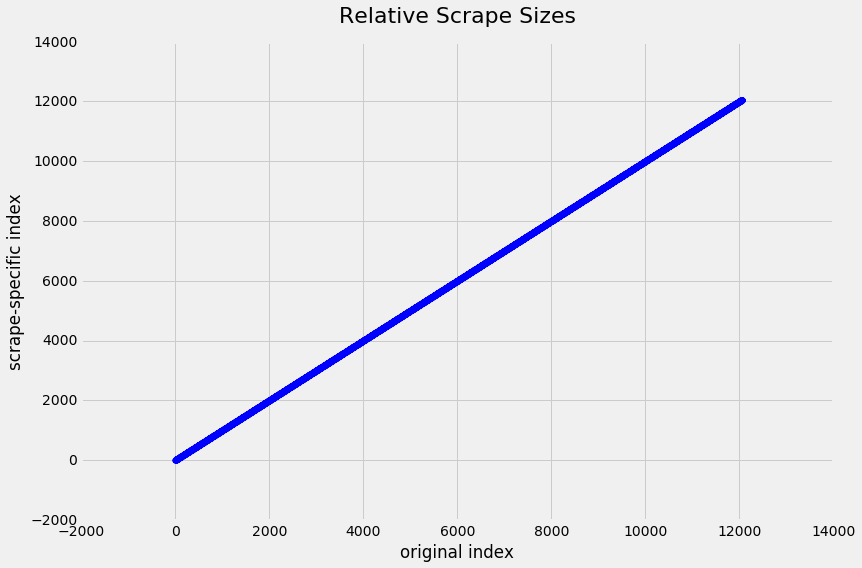

In [6]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(range(0, len(biggest_df)), biggest_df.index, color = 'blue', \
            alpha = 1, s = 30, label = 'included')

plt.title('Relative Scrape Sizes', fontsize = 22, y = 1.03)

# y label
plt.ylabel('scrape-specific index')

# x label
plt.xlabel('original index')

# set the figure boundaries
# plt.ylim([-100, 4000])
# plt.xlim([-200, 20000])
plt.grid(True)
#plt.legend(loc='center right', fontsize = 8)

plt.show()

In [7]:
biggest_df = biggest_df.reset_index(drop = True)
lil_listy = []
for i in range(len(biggest_df)):
    lil_listy.append(len(biggest_df['scripts'][i]))
set(lil_listy)

{4, 6, 7, 8, 145, 146, 147, 148, 150, 151, 152, 153}

In [8]:
len(biggest_df)

12067

In [9]:
old_df = cPickle.load(open('assets/big_df_model-ready.p', 'rb'))
len(old_df)

18659

In [11]:
biggest_df.head(1)

,name,latitude,longitude,scripts
0,Bellevue,42.40434,2.479931,"[<script async=""true"" src=""https://w.estat.com..."


In [12]:
old_df.head(1)

,name,cuisine,blurb,currency,photos,add_info,num_words,photo_count,latitude,longitude,...,parking,dinner_only,wheelchair,private_dining,with_rooms,booking,lunch_only,tennis,dinner_tasting,valet
0,Bellevue,Catalan,Now here is a delicious find! The menu positiv...,EUR,[https://download.viamichelin.com/media/image/...,"[Lunch 20 €, Menu 32/56 € - Carte 45/58 €, Mea...",46,6,42.40434,2.479931,...,1,0,0,0,0,0,0,0,0,0


In [35]:
biggest_df[['name', 'latitude']].duplicated().sum()

84

In [39]:
biggest_df.drop_duplicates(['name', 'latitude'], keep = 'first', inplace = True)
biggest_df.reset_index(drop = True, inplace = True)

In [40]:
old_df[['name', 'latitude']].duplicated().sum()

0

In [41]:
old_df.drop_duplicates(['name', 'latitude'], keep = 'first', inplace = True)
old_df.reset_index(drop = True, inplace = True)

In [42]:
biggest_pairs = []

for i in range(len(biggest_df)):
    x = str(biggest_df['name'][i])
    y = str(biggest_df['latitude'][i])
    entry = x + ' ' + y
    biggest_pairs.append(entry)
    
biggest_pairs = pd.DataFrame(biggest_pairs)
biggest_pairs.columns = ['pair']
    
old_pairs = []

for i in range(len(old_df)):
    x = str(old_df['name'][i])
    y = str(old_df['latitude'][i])
    entry = x + ' ' + y
    old_pairs.append(entry)
    
old_pairs = pd.DataFrame(old_pairs)
old_pairs.columns = ['pair']
    
print len(set(biggest_pairs['pair']))
print len(set(old_pairs['pair']))

11983
18651


In [45]:
set(biggest_pairs['pair']) - set(old_pairs['pair'])

{'Atelier Vivanda - Cherche Midi 48.85054',
 'CLYNe - Das Restaurant 49.31837',
 'Edinbane Inn 57.470192',
 'Lor 9 Beef Kway Teow 1.312193',
 'Lou Bequet 45.615395',
 'Markt XI 51.27213',
 'Nasi Lemak Kukus 1.304528',
 'None nan',
 'Pitt Cue Co. 51.51342'}

In [46]:
set(old_pairs['pair']) - set(biggest_pairs['pair'])

{'Wagon L\xc3\xa9o 50.001133',
 'The National Dining Rooms 51.50839',
 'Villa Bordoni 43.586483',
 'Cotswold Plough 51.71664',
 'Aromi 45.42809',
 'Bovio 44.6408',
 'Hana 51.14544',
 'Wassail 40.721138',
 'Winzerstube Weyher 49.26628',
 'Winstub 48.13814',
 "L'Or\xc3\xa9e du Bois 50.65398",
 'Il Tipico 44.38079',
 'Les Semailles 48.65727',
 'Ochsenstube 48.06442',
 'The Latymer 51.35637',
 'Don Alfonso 1890 40.60758',
 'Sasso 60.16791',
 'Lewtrenchard Manor 50.65384',
 "Sam's Brasserie 51.4918",
 'Le Vivier 47.70076',
 "St Petroc's 50.54078",
 'Le Garriane 42.69706',
 'Weinstein 54.34359',
 'd/\\blju "W" 50.93198',
 'Shell Bay 50.67771',
 'Tim\xc3\xa9 45.47394',
 "Auberge de l'\xc3\x89curie 49.38239",
 'Locanda Belvedere 43.87975',
 'La Cueva de Castilla 50.86718',
 'Pier 17 49.45457',
 'Le Coquillage 48.6373',
 'Restaurant de Ranc\xc3\xa9 45.99527',
 'Les C\xc3\xa8dres 45.050262',
 'I Tri Basei 45.425125',
 'Le Bartok 43.64701',
 'Le Grenier 45.75156',
 'Oarsman 53.944004',
 'Au Prove

In [53]:
for i in range(len(biggest_df)):
    if old_df['name'][i] == 'Cotswold Plough':
        print i

2308


In [54]:
old_df.ix[2307:,:]

,name,cuisine,blurb,currency,photos,add_info,num_words,photo_count,latitude,longitude,...,parking,dinner_only,wheelchair,private_dining,with_rooms,booking,lunch_only,tennis,dinner_tasting,valet
2307,The Potager,Mediterranean,Understated hotel restaurant with a pleasant g...,GBP,[],"[Carte £ 25/53, Park or Garden, Wheelchair acc...",45,0,51.747070,-1.871800,...,1,0,1,0,0,0,0,0,0,0
2308,Cotswold Plough,British traditional,"Set within a 16C hotel, a lovely three-roomed ...",GBP,[],"[Carte £ 22/39, Park or Garden, Enclosed car p...",37,0,51.716640,-1.589400,...,1,0,0,0,0,0,0,0,0,0
2309,Ockenden Manor,Modern,Contemporary orangery dining room opening onto...,GBP,[],"[Menu £ 20 (weekday lunch)/60, booking essenti...",43,0,51.006480,-0.144760,...,1,0,1,0,0,0,0,0,0,0
2310,DH1,Modern,An intimate restaurant on the lower floor of a...,GBP,[],"[Menu £ 25/60 - Carte approx. £ 40, dinner onl...",38,0,54.773094,-1.589634,...,1,1,1,0,0,0,0,0,0,0
2311,Gravetye Manor,British modern,A charming country house dining room with wood...,GBP,[],"[Menu £ 30 - Carte £ 58/71, booking essential,...",43,0,51.089320,-0.056910,...,1,0,0,1,0,0,0,0,0,0
2312,Tudor Room,Modern,Intimate hotel dining room with mullioned wind...,GBP,[],"[Menu £ 58, dinner only - and Friday lunch - b...",37,0,51.417590,-0.545847,...,1,0,1,0,0,0,0,0,0,0
2313,Q,Modern,"Light, bright hotel restaurant with wood frame...",GBP,[],"[Menu £ 30 (dinner) - Carte £ 28/49, Address 2...",35,0,50.335480,-4.634270,...,0,0,0,0,0,0,0,0,0,0
2314,L'Odas,Creative,'Odas' is an acronym based on Olivier Da Silva...,EUR,[https://download.viamichelin.com/media/image2...,"[Lunch 28 €, Menu 48/68 € - Carte 66/92 €, Mea...",53,25,49.441120,1.094469,...,0,0,1,0,0,0,0,0,0,0
2315,Harbourside,Fish and seafood,Comfortable hotel dining room boasting crisp l...,GBP,[],"[Menu £ 21 (weekday lunch) - Carte £ 31/45 s, ...",26,0,51.948060,1.286830,...,1,0,0,0,0,0,0,0,0,0
2316,George's,British traditional,Formally laid restaurant decorated in subtle p...,GBP,[],"[Menu £ 20/37, Enclosed car park, Address Main...",35,0,53.326200,-1.645600,...,1,0,0,0,0,0,0,0,0,0


In [56]:
df = old_df.merge(biggest_df, on=['name', 'latitude'], how = 'left')
len(df)

18742

In [47]:
len(df['blurb'].value_counts())

18652

In [70]:
df[['name', 'latitude']].duplicated().sum()

91

In [78]:
len(df)

18651